In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
reviews=pd.read_csv("imdbreview.csv")

In [3]:
reviews.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (Dense,Flatten,InputLayer,BatchNormalization,Input,Embedding)

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
reviews["review"].head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [6]:
reviews=reviews[0:5001]

In [7]:
len(reviews)

5001

In [8]:
reviews["review"]=reviews["review"].str.lower()

In [9]:
reviews

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
4996,i watched this series when it first came out i...,positive
4997,once again jet li brings his charismatic prese...,positive
4998,"i rented this movie, after hearing chris gore ...",negative
4999,this was a big disappointment for me. i think ...,negative


In [10]:
reviews["review"]=reviews["review"].str.replace("<br>"," ")

In [11]:
reviews.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [12]:
reviews["review"]=reviews["review"].str.replace("<br />"," ")

In [13]:
reviews.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming t...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [14]:
reviews.tail(10)

,review,sentiment
4991,thomas edison may have done lots of great inve...,negative
4992,i first saw this movie when i was a freshman i...,positive
4993,this is a painfully slow story about the last ...,negative
4994,joel schumacher made a heck of a choice when h...,positive
4995,an interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,positive
4997,once again jet li brings his charismatic prese...,positive
4998,"i rented this movie, after hearing chris gore ...",negative
4999,this was a big disappointment for me. i think ...,negative
5000,"not a movie for everyone, but this movie is in...",positive


In [15]:
reviews.replace({"sentiment":{"negative":0,"positive":1}},inplace=True)

In [16]:
reviews

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming t...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1
...,...,...
4996,i watched this series when it first came out i...,1
4997,once again jet li brings his charismatic prese...,1
4998,"i rented this movie, after hearing chris gore ...",0
4999,this was a big disappointment for me. i think ...,0


In [17]:
import nltk

In [18]:
from nltk.corpus import stopwords

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stop_words = set(stopwords.words('english'))

In [21]:
def removestopwords(texts):
    text=texts.split(" ")
    clean_text=[word for word in text if word not in stop_words]
    return " ".join(clean_text)
            
    

In [22]:
reviews["review"]=reviews["review"].apply(removestopwords)

In [23]:
reviews["review"]

0       one reviewers mentioned watching 1 oz episode ...
1       wonderful little production.   filming techniq...
2       thought wonderful way spend time hot summer we...
3       basically there's family little boy (jake) thi...
4       petter mattei's "love time money" visually stu...
                              ...                        
4996    watched series first came 70s.i 14 years old w...
4997    jet li brings charismatic presence movie scree...
4998    rented movie, hearing chris gore saying someth...
4999    big disappointment me. think worst mastroianni...
5000    movie everyone, movie top 10. lover black come...
Name: review, Length: 5001, dtype: object

In [28]:
reviews.head(5)

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production. filming techniq...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there's family little boy (jake) thi...,0
4,"petter mattei's ""love time money"" visually stu...",1


In [26]:
reviews["review"]=reviews["review"].astype(str)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
c=CountVectorizer()

In [33]:
x_array=c.fit_transform(reviews["review"])

In [36]:
x_array

<5001x39042 sparse matrix of type '<class 'numpy.int64'>'
	with 513354 stored elements in Compressed Sparse Row format>

In [34]:
x_df=pd.DataFrame(x_array)

In [35]:
x_df.head(5)

,0
0,"(0, 24306)\t1\n (0, 28965)\t1\n (0, 21929)..."
1,"(0, 24306)\t1\n (0, 37744)\t1\n (0, 30197)..."
2,"(0, 24306)\t1\n (0, 37744)\t1\n (0, 29134)..."
3,"(0, 13054)\t1\n (0, 37740)\t1\n (0, 19179)..."
4,"(0, 24306)\t6\n (0, 12028)\t1\n (0, 34817)..."


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
X=x_array.toarray()

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
y=reviews["sentiment"]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_array,y,test_size=0.3,random_state=14)

In [45]:
model = Sequential()

# Input layer and one hidden layer (you can add more layers and units as needed)
model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))  # Hidden layer
model.add(Dense(1, activation="sigmoid"))

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(optimizer="Adagrad", loss='binary_crossentropy')

In [49]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6919 - val_loss: 0.6826
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6693 - val_loss: 0.6663
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6472 - val_loss: 0.6461
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6218 - val_loss: 0.6262
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5927 - val_loss: 0.6087
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5770 - val_loss: 0.5943
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5569 - val_loss: 0.5815
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5419 - val_loss: 0.5697
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5214 - val_loss: 0.5595
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5075 - val_loss: 0.5503


In [51]:
losses_df=pd.DataFrame(model.history.history)

<AxesSubplot:>

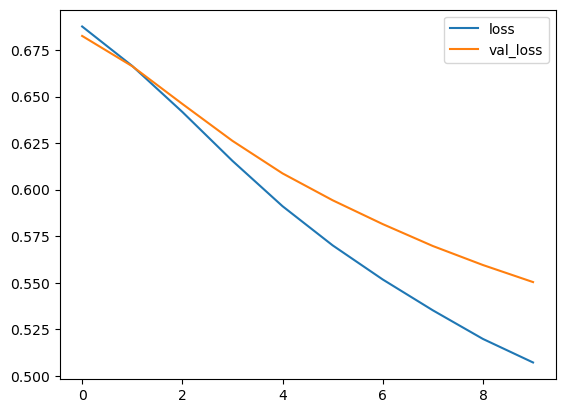

In [52]:
losses_df.plot()

In [61]:
def predict_sentiment(texts):
    text=removestopwords(texts)
    text=pd.Series(text)
    x_array=c.transform(text)
    prediction=model.predict(x_array)
    if prediction[0]>=0.5:
        return "This is a positive statement"
    else:
        return "This is a negative statement"

In [63]:
predict_sentiment("Hey this is so bad and the worst")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


'This is a negative statement'